# Data Cleaning in Data Analysis

## Definition
- **Process Purpose**: Identifying and rectifying errors, inconsistencies, and irrelevant information in a dataset.
- **Importance**: Enhances data quality and reliability for more accurate and valid analysis results.

## Methods Used

### Removing Duplicates
- **Objective**: Ensures each data point is unique.
- **Impact**: Skewed analysis results and distorted findings can be avoided.

### Handling Null Values
- **Objective**: Address missing data points.
- **Impact**: Prevents analysis disruption and biased results.

### Removing Extra White Spaces
- **Objective**: Trim leading, trailing, and excessive internal white spaces in text data.
- **Impact**: Ensures uniformity in text data for reliable analysis.

### Standardizing Text Case
- **Objective**: Converts all text to a consistent case, such as lowercase.
- **Impact**: Removes inconsistencies for reliable text analysis.

### Relabeling Data
- **Objective**: Replaces labels with standardized terms.
- **Impact**: Ensures clear and accurate categorization.

### Removing HTML Tags
- **Objective**: Eliminates HTML tags from text data.
- **Impact**: Reduces noise in text data for easier analysis.

### Removing Unwanted Punctuation
- **Objective**: Removes specified punctuation marks.
- **Impact**: Simplifies text data and focuses on meaningful content.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset excel sheet
df = pd.read_excel('Movie sarcasm Final Dataset.xlsx')
df

,Review,Sentiment,Sarcasm
0,One of the other reviewers has mentioned that ...,Positive,Non-Sarcastic
1,A wonderful little production. <br /><br />The...,Positive,Non-Sarcastic
2,This movie was a groundbreaking experience!<br...,Positive,Sarcastic
3,I thought this was a wonderful way to spend ti...,Positive,Non-Sarcastic
4,Basically there's a family where a little boy ...,Negative,Sarcastic
...,...,...,...
6539,This movie's idea of character development is ...,Negative,Sarcastic
6540,I guess they ran out of budget for a decent sc...,Negative,Sarcastic
6541,Who needs a plot when you have explosions ever...,Negative,Sarcastic
6542,Is there an award for most generic action movi...,Negative,Sarcastic


In [3]:
# The size of the dataset 
df.shape
rows=df.shape[0]
print(f"no.of datapoints {rows}")

no.of datapoints 6544


# 1) Checking for null values

In [4]:
#checking for null values
rows_with_nulls = df[df.isnull().any(axis=1)]

print("Rows with any null values:")
print(rows_with_nulls)

# Remove rows with any null values
df = df.dropna()

print("\nDataFrame with rows containing any null values removed:")
print(f"the size of the dataset after the removal of null values {df.shape}")

df

Rows with any null values:
                                                 Review Sentiment Sarcasm
2604  Everyone should totally see this movie! It's f...  positive     NaN
2605  as a sequel,this is not a bad movie.i actually...  positive     NaN
2606  I've just seen this movie in a preview and I c...  positive     NaN
2607  This TV show is possibly the most pathetic dis...  negative     NaN
2608  The first film ever made. Workers streaming fr...  positive     NaN
2609  Just kidding.<br /><br />Seeking greener pastu...  positive     NaN
2610  This film is a total bore. Entrapment is way b...  negative     NaN
2611  This was an attempt toward a romantic comedy, ...  negative     NaN
2612  There are some redeeming qualities to this sho...  negative     NaN
2613  I like David Hamilton's artistic photographs o...  positive     NaN
3087  For anyone who has ever sought happiness, "Hal...  positive     NaN
3389  The ending of this horror movie is so ambiguou...   Neutral     NaN
3402  The a

,Review,Sentiment,Sarcasm
0,One of the other reviewers has mentioned that ...,Positive,Non-Sarcastic
1,A wonderful little production. <br /><br />The...,Positive,Non-Sarcastic
2,This movie was a groundbreaking experience!<br...,Positive,Sarcastic
3,I thought this was a wonderful way to spend ti...,Positive,Non-Sarcastic
4,Basically there's a family where a little boy ...,Negative,Sarcastic
...,...,...,...
6539,This movie's idea of character development is ...,Negative,Sarcastic
6540,I guess they ran out of budget for a decent sc...,Negative,Sarcastic
6541,Who needs a plot when you have explosions ever...,Negative,Sarcastic
6542,Is there an award for most generic action movi...,Negative,Sarcastic


# 2) Working on labels columns

## a) converting uppercase to lowercase 

In [5]:
#converting all the uppercases to lower cases in labels columns 
df[['Sarcasm', 'Sentiment']]
df['Sarcasm'] = df['Sarcasm'].str.lower()
df['Sentiment'] = df['Sentiment'].str.lower()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11748\4254708946.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sarcasm'] = df['Sarcasm'].str.lower()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11748\4254708946.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Sentiment'].str.lower()


In [6]:
(df[['Sarcasm', 'Sentiment']])

,Sarcasm,Sentiment
0,non-sarcastic,positive
1,non-sarcastic,positive
2,sarcastic,positive
3,non-sarcastic,positive
4,sarcastic,negative
...,...,...
6539,sarcastic,negative
6540,sarcastic,negative
6541,sarcastic,negative
6542,sarcastic,negative


## b) replacing all the labels uniformly

In [7]:
# replacing all the labels to sarcastic and not sarcastic
df['Sarcasm'] = df['Sarcasm'].str.strip()
df['Sarcasm'] = df['Sarcasm'].replace({
    'sarcasm': 'sarcastic',
    'saracstic': 'sarcastic',
    'not sarcasm': 'not sarcastic',
    'non sarcasm': 'not sarcastic',
    'not-sarcasm': 'not sarcastic',
    'non-sarcasm' : 'not sarcastic',
    'non-sarcastic' : 'not sarcastic',
    'nsa': 'not sarcastic'
})
df.Sarcasm

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11748\1653297922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sarcasm'] = df['Sarcasm'].str.strip()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11748\1653297922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sarcasm'] = df['Sarcasm'].replace({


0       not sarcastic
1       not sarcastic
2           sarcastic
3       not sarcastic
4           sarcastic
            ...      
6539        sarcastic
6540        sarcastic
6541        sarcastic
6542        sarcastic
6543        sarcastic
Name: Sarcasm, Length: 6531, dtype: object

In [8]:
# replacing all the labels to positive and negative
df['Sentiment'] = df['Sentiment'].str.strip()
df['Sentiment'] = df['Sentiment'].replace({
    'negative': 'negative',
    'positive': 'positive',
    'neutral': 'neutral',
    'nositive': 'positive'
})
df.Sentiment

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11748\1908158367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Sentiment'].str.strip()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11748\1908158367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Sentiment'].replace({


0       positive
1       positive
2       positive
3       positive
4       negative
          ...   
6539    negative
6540    negative
6541    negative
6542    negative
6543    negative
Name: Sentiment, Length: 6531, dtype: object

                                        # cleaning the reviews section

# 3) Removing the duplicate reviews in the dataset

In [9]:
df = df.drop_duplicates(subset='Review' , keep ='first')
df
finalrows = df.shape[0]
print(f"no.of rows dropped {rows-finalrows}") 
print(df.shape)

no.of rows dropped 47
(6497, 3)


# 4) Removing HTML tags 

In [10]:
import re
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

df['cleaned_data'] = df['Review'].apply(remove_html)
df.cleaned_data

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11748\2872427168.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_data'] = df['Review'].apply(remove_html)


0       One of the other reviewers has mentioned that ...
1       A wonderful little production. The filming tec...
2       This movie was a groundbreaking experience! I'...
3       I thought this was a wonderful way to spend ti...
4       Basically there's a family where a little boy ...
                              ...                        
6539    This movie's idea of character development is ...
6540    I guess they ran out of budget for a decent sc...
6541    Who needs a plot when you have explosions ever...
6542    Is there an award for most generic action movi...
6543          Two hours of non-stop, mind-numbing action.
Name: cleaned_data, Length: 6497, dtype: object

# 5) Removing the punctuation marks

In [11]:
import string
def remove_punctuation(text):
    # Define the punctuation marks to keep
    keep = ['?', '!', '.',]
    punctuation_to_remove = ''.join(p for p in string.punctuation if p not in keep)
    translation_table = str.maketrans('', '', punctuation_to_remove)
    return text.translate(translation_table)

# Apply the function to the 'cleaned_data' column
df['cleaned_data'] = df['cleaned_data'].apply(remove_punctuation)
df.cleaned_data

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11748\536777500.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_data'] = df['cleaned_data'].apply(remove_punctuation)


0       One of the other reviewers has mentioned that ...
1       A wonderful little production. The filming tec...
2       This movie was a groundbreaking experience! Iv...
3       I thought this was a wonderful way to spend ti...
4       Basically theres a family where a little boy J...
                              ...                        
6539    This movies idea of character development is m...
6540    I guess they ran out of budget for a decent sc...
6541    Who needs a plot when you have explosions ever...
6542    Is there an award for most generic action movi...
6543             Two hours of nonstop mindnumbing action.
Name: cleaned_data, Length: 6497, dtype: object

# 6) Removing the urls

In [12]:
# removal of urls in reviews
import re
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

contains_url = df['Review'].str.contains(r'https?://\S+|www\.\S+', regex=True)
# Display rows with URLs
print("Rows with URLs:")
print(df[contains_url])

df['cleaned_data'] = df['cleaned_data'].apply(remove_urls)
df.cleaned_data

Rows with URLs:
                                                 Review Sentiment  \
674   Pendragon Pictures' new film "H G Wells' War o...  positive   
1002  Heya Denver fans! The animation is a cartoon's...  positive   
1271  This show is totally worth watching. It has th...  positive   
1570  As with all the other reviewers, this movie ha...  positive   
1610  Chop Shop, the second feature from Ramin Bahra...  positive   
2777  I don't hand out "ones" often, but if there wa...  negative   

            Sarcasm                                       cleaned_data  
674   not sarcastic  Pendragon Pictures new film H G Wells War of t...  
1002  not sarcastic  Heya Denver fans! The animation is a cartoons ...  
1271  not sarcastic  This show is totally worth watching. It has th...  
1570  not sarcastic  As with all the other reviewers this movie has...  
1610  not sarcastic  Chop Shop the second feature from Ramin Bahran...  
2777  not sarcastic  I dont hand out ones often but if there w

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11748\1698326960.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_data'] = df['cleaned_data'].apply(remove_urls)


0       One of the other reviewers has mentioned that ...
1       A wonderful little production. The filming tec...
2       This movie was a groundbreaking experience! Iv...
3       I thought this was a wonderful way to spend ti...
4       Basically theres a family where a little boy J...
                              ...                        
6539    This movies idea of character development is m...
6540    I guess they ran out of budget for a decent sc...
6541    Who needs a plot when you have explosions ever...
6542    Is there an award for most generic action movi...
6543             Two hours of nonstop mindnumbing action.
Name: cleaned_data, Length: 6497, dtype: object

# 7) Removing extra spaces and lines 

In [13]:
#removing the extra white spaces
df = df[df['cleaned_data'].astype(bool)]
df['cleaned_data'] = df['cleaned_data'].replace(r'\s+', ' ', regex=True).str.strip()
df.cleaned_data

0       One of the other reviewers has mentioned that ...
1       A wonderful little production. The filming tec...
2       This movie was a groundbreaking experience! Iv...
3       I thought this was a wonderful way to spend ti...
4       Basically theres a family where a little boy J...
                              ...                        
6539    This movies idea of character development is m...
6540    I guess they ran out of budget for a decent sc...
6541    Who needs a plot when you have explosions ever...
6542    Is there an award for most generic action movi...
6543             Two hours of nonstop mindnumbing action.
Name: cleaned_data, Length: 6497, dtype: object

In [14]:
df

,Review,Sentiment,Sarcasm,cleaned_data
0,One of the other reviewers has mentioned that ...,positive,not sarcastic,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,not sarcastic,A wonderful little production. The filming tec...
2,This movie was a groundbreaking experience!<br...,positive,sarcastic,This movie was a groundbreaking experience! Iv...
3,I thought this was a wonderful way to spend ti...,positive,not sarcastic,I thought this was a wonderful way to spend ti...
4,Basically there's a family where a little boy ...,negative,sarcastic,Basically theres a family where a little boy J...
...,...,...,...,...
6539,This movie's idea of character development is ...,negative,sarcastic,This movies idea of character development is m...
6540,I guess they ran out of budget for a decent sc...,negative,sarcastic,I guess they ran out of budget for a decent sc...
6541,Who needs a plot when you have explosions ever...,negative,sarcastic,Who needs a plot when you have explosions ever...
6542,Is there an award for most generic action movi...,negative,sarcastic,Is there an award for most generic action movi...


# Analysis on dataset 

In [15]:
# analysis on no.of reviews on each category
sarcastic_reviews = df['Sarcasm'].value_counts().get('sarcastic', 0)
not_sarcastic_reviews = df['Sarcasm'].value_counts().get('not sarcastic', 0)

print(f"Number of sarcastic labels: {sarcastic_reviews}")
print(f"Number of not sarcastic labels: {not_sarcastic_reviews}")

positive_reviews = df['Sentiment'].value_counts().get('positive', 0)
negative_reviews = df['Sentiment'].value_counts().get('negative', 0)

print(f"Number of positive reviews: {positive_reviews}")
print(f"Number of negative reviews: {negative_reviews}")


Number of sarcastic labels: 3518
Number of not sarcastic labels: 2979
Number of positive reviews: 2300
Number of negative reviews: 4184


Percentage of reviews:
Sarcastic and Positive: 5.3%
Sarcastic and Negative: 48.6%
Not Sarcastic and Positive: 30.1%
Not Sarcastic and Negative: 15.8%


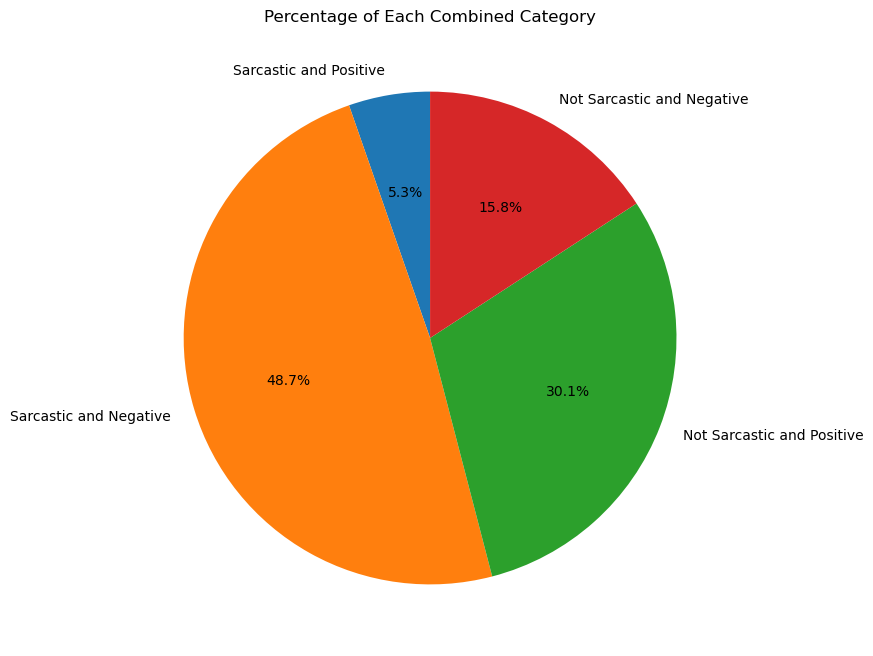

In [16]:
# calculating the percentages of different categories
# categories considered 1)positive_sarcastic 2)negative_sarcastic 3)positive_non_sarcastic 4)negative_non_sarcastic

# Calculate percentages
total_reviews = len(df)
sarcastic_positive_percentage = (df[(df['Sarcasm'] == 'sarcastic') & (df['Sentiment'] == 'positive')].shape[0] / total_reviews) * 100
sarcastic_negative_percentage = (df[(df['Sarcasm'] == 'sarcastic') & (df['Sentiment'] == 'negative')].shape[0] / total_reviews) * 100
non_sarcastic_positive_percentage = (df[(df['Sarcasm'] == 'not sarcastic') & (df['Sentiment'] == 'positive')].shape[0] / total_reviews) * 100
non_sarcastic_negative_percentage = (df[(df['Sarcasm'] == 'not sarcastic') & (df['Sentiment'] == 'negative')].shape[0] / total_reviews) * 100

# Print the percentages
print("Percentage of reviews:")
print(f"Sarcastic and Positive: {sarcastic_positive_percentage:.1f}%")
print(f"Sarcastic and Negative: {sarcastic_negative_percentage:.1f}%")
print(f"Not Sarcastic and Positive: {non_sarcastic_positive_percentage:.1f}%")
print(f"Not Sarcastic and Negative: {non_sarcastic_negative_percentage:.1f}%")

# Plot the pie chart
labels = ['Sarcastic and Positive', 'Sarcastic and Negative', 'Not Sarcastic and Positive', 'Not Sarcastic and Negative']
sizes = [sarcastic_positive_percentage, sarcastic_negative_percentage, non_sarcastic_positive_percentage, non_sarcastic_negative_percentage]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Each Combined Category')
plt.show()


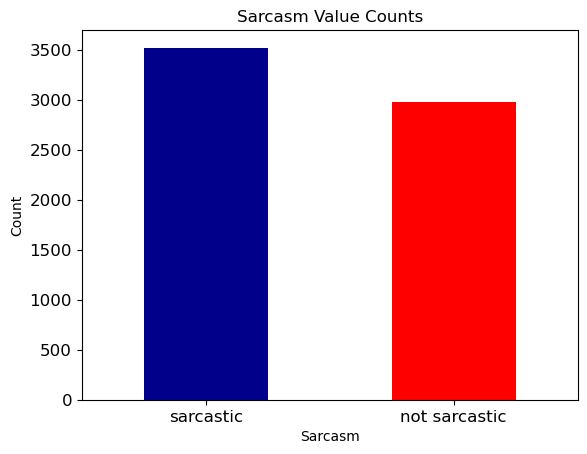

Sarcasm
sarcastic        3518
not sarcastic    2979
Name: count, dtype: int64

In [17]:
df['Sarcasm'].value_counts().plot(kind='bar', color=['darkblue', 'r'], rot=0, fontsize='large')
plt.title('Sarcasm Value Counts')
plt.xlabel('Sarcasm')
plt.ylabel('Count')
plt.show()
df['Sarcasm'].value_counts()

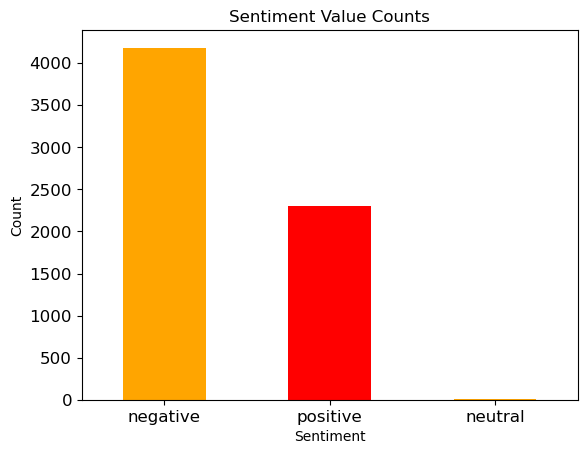

Sentiment
negative    4184
positive    2300
neutral       13
Name: count, dtype: int64

In [18]:
df['Sentiment'].value_counts().plot(kind='bar', color=['orange', 'r'], rot=0, fontsize='large')
plt.title('Sentiment Value Counts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
df['Sentiment'].value_counts()

In [19]:
# finding the average length of review in the dataset
avg_length = df['Review'].str.len().mean()
avg_length

654.9422810527936

## creating the excel sheet with cleaned dataset

In [20]:
df_new = pd.read_excel('Cleaned_Dataset.xlsx')
df_new['cleaned_data'] = df['cleaned_data']
df_new['Sentiment'] = df['Sentiment']
df_new['Sarcasm'] = df['Sarcasm']
df_new.to_excel('Cleaned new Dataset.xlsx', index=False)
df_new

,cleaned_data,Sentiment,Sarcasm
0,One of the other reviewers has mentioned that ...,positive,not sarcastic
1,A wonderful little production. The filming tec...,positive,not sarcastic
2,This movie was a groundbreaking experience! Iv...,positive,sarcastic
3,I thought this was a wonderful way to spend ti...,positive,not sarcastic
4,Basically theres a family where a little boy J...,negative,sarcastic
...,...,...,...
6539,This movies idea of character development is m...,negative,sarcastic
6540,I guess they ran out of budget for a decent sc...,negative,sarcastic
6541,Who needs a plot when you have explosions ever...,negative,sarcastic
6542,Is there an award for most generic action movi...,negative,sarcastic
